In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')

#Visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

#To scale our data
from sklearn.preprocessing import StandardScaler

#To split the data into training and testing set
from sklearn.model_selection import train_test_split

#Classification model- Support Vector Machine
from sklearn.svm import SVC

#Classification model performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [2]:
df=pd.read_csv(r"C:\Users\Harshitha\OneDrive\Desktop\diabetes (1) (1).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(1500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Pregnancies                 1500 non-null int64
Glucose                     1500 non-null int64
BloodPressure               1500 non-null int64
SkinThickness               1500 non-null int64
Insulin                     1500 non-null int64
BMI                         1500 non-null float64
DiabetesPedigreeFunction    1500 non-null float64
Age                         1500 non-null int64
Outcome                     1500 non-null int64
dtypes: float64(2), int64(7)
memory usage: 105.5 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,3.875333,120.924000,69.044667,20.535333,79.838000,32.017933,0.476651,33.200000,0.359333
std,3.357078,32.262757,19.326519,15.881212,118.312455,8.124323,0.338231,11.649427,0.479965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.245750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,125.250000,36.600000,0.630000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


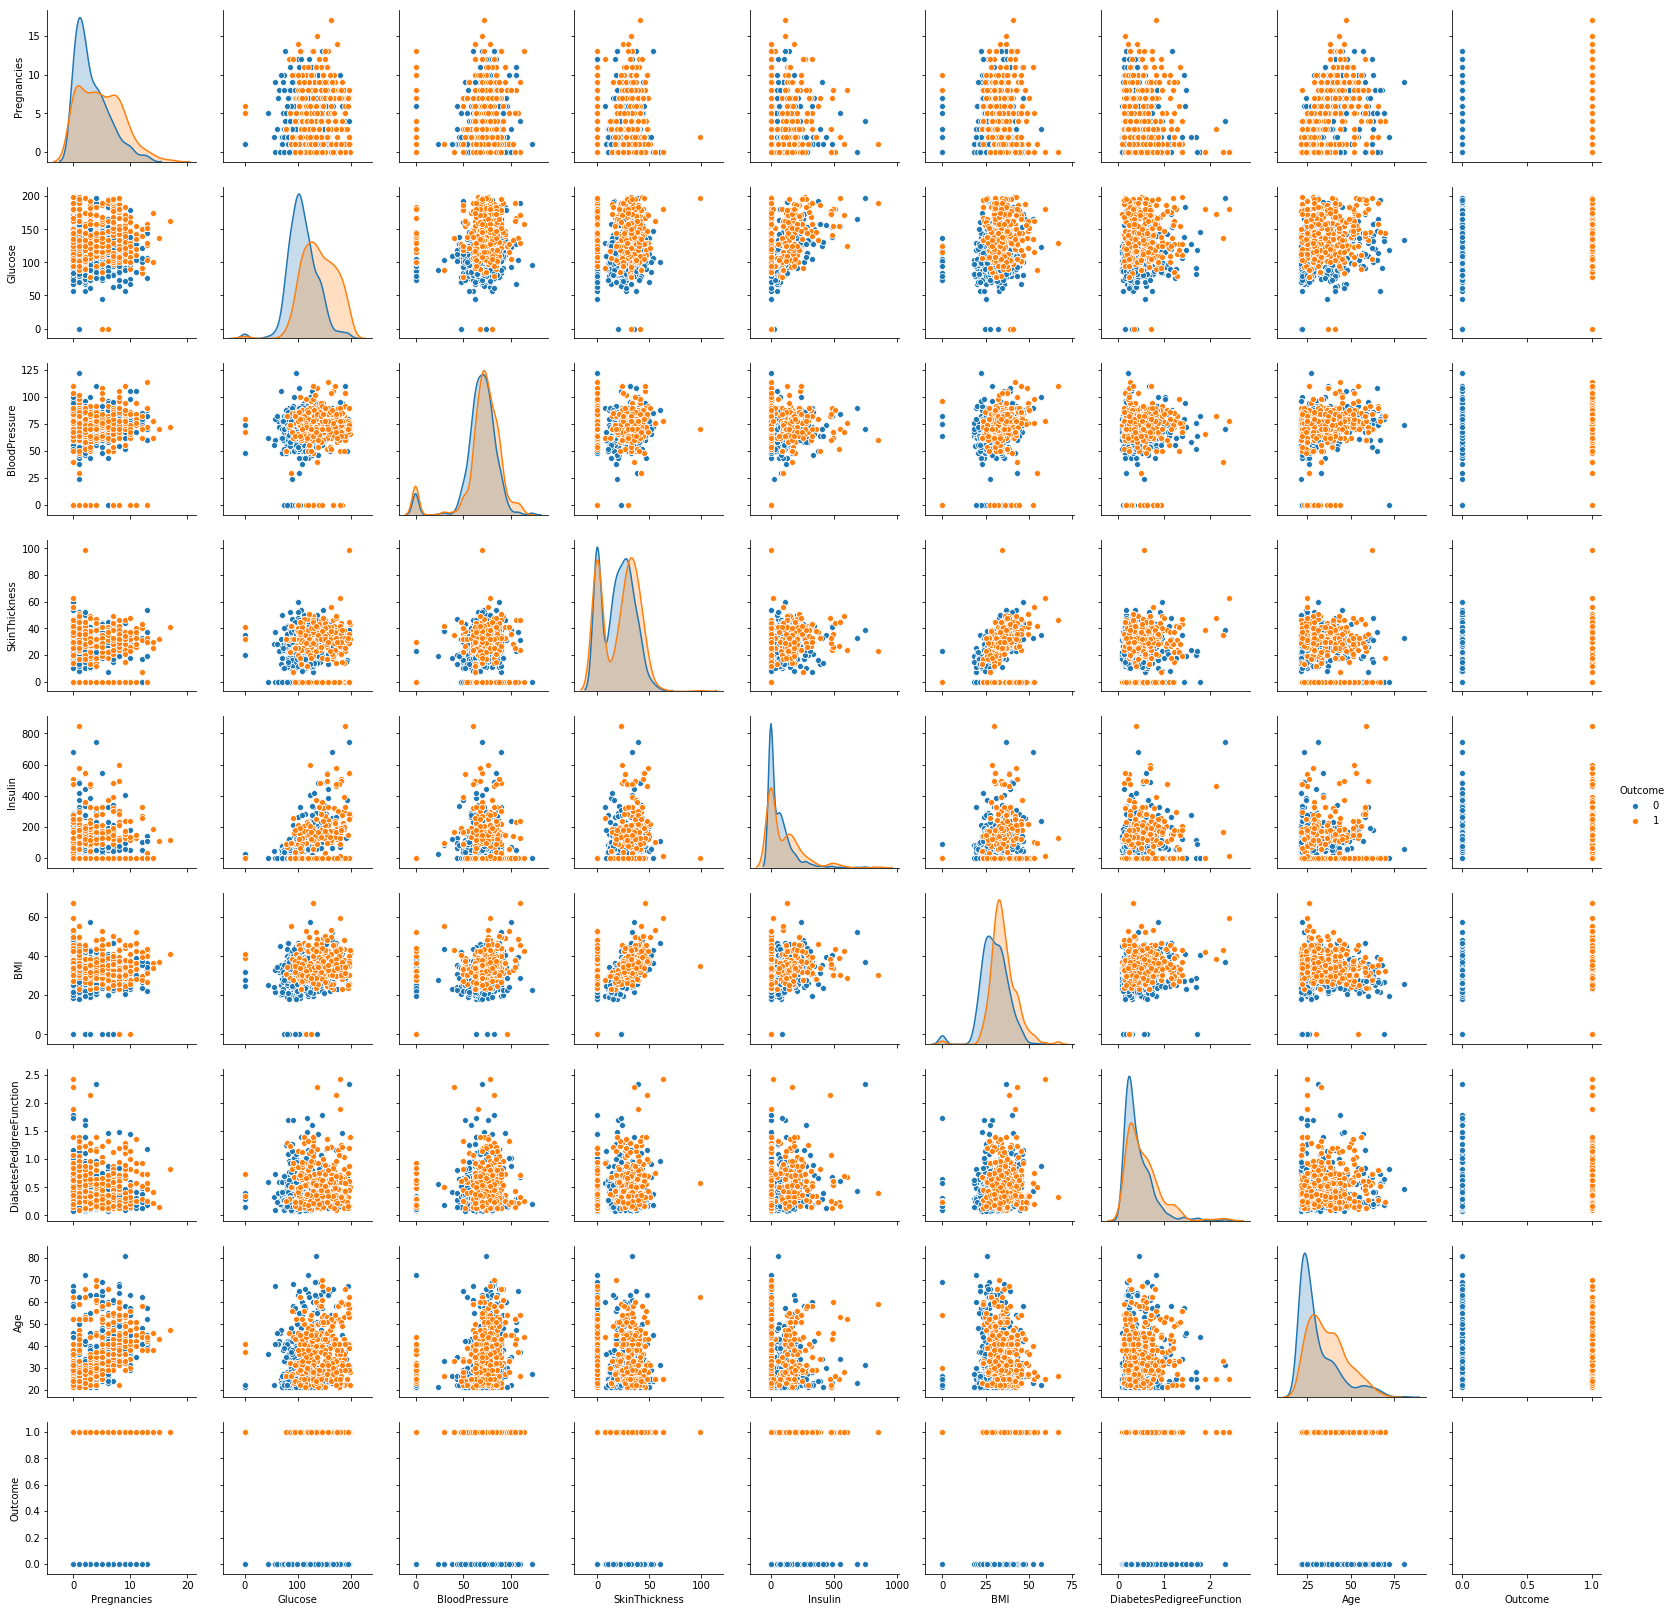

In [6]:
sns.pairplot(df,hue='Outcome')

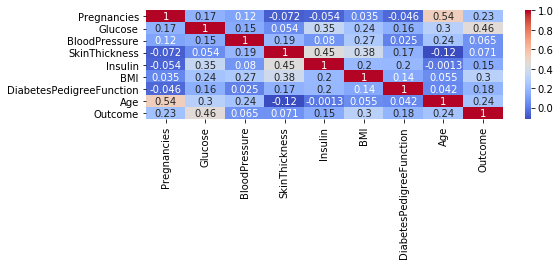

In [7]:
plt.figure(figsize=(8,2))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

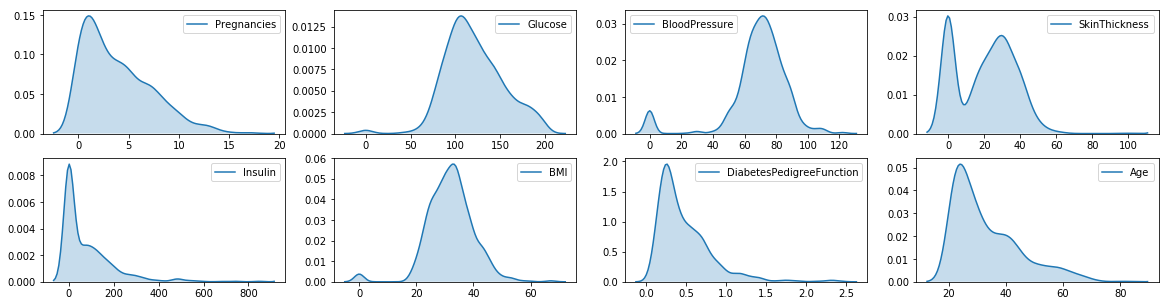

In [8]:
plt.figure(figsize=(20,5))
for i,col in enumerate(df.iloc[:,:-1]):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[col],shade=True)
plt.show()

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.299688,109.831426,68.101977,19.694069,66.986472,30.163580,0.431136,31.121748
1,4.901670,140.701299,70.725417,22.035250,102.751391,35.324119,0.557800,36.905380


In [47]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [48]:
ss=StandardScaler()
ss.fit(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
x=ss.transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=200,test_size=0.3,stratify=y)

In [14]:
model=SVC(kernel='linear',C=10.0)

model.fit(xtrain,ytrain)
ypred=model.predict(xtest) 
ac=accuracy_score(ytest,ypred) 
cm=confusion_matrix(ytest,ypred) 
cr=classification_report(ytest,ypred) 
train=model.score(xtrain,ytrain) 
test=model.score(xtest,ytest)
    
print(f'{model} Accuracy:{ac}\n{cm}\n{cr}\nTraining Accuracy: {train}\nTesting Accuracy: {test}')

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) Accuracy:0.7844444444444445
[[258  30]
 [ 67  95]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       288
           1       0.76      0.59      0.66       162

   micro avg       0.78      0.78      0.78       450
   macro avg       0.78      0.74      0.75       450
weighted avg       0.78      0.78      0.78       450

Training Accuracy: 0.7666666666666667
Testing Accuracy: 0.7844444444444445


In [15]:
def prediction(input_data=()):
    #Converting to numpy array
    array_input_data=np.asarray(input_data)
    
    #Reshaping to tell the model we want prediction for 1 instance
    x=array_input_data.reshape(1,-1)
    
    #Standardising data
    standard_x=ss.transform(x)
    
    #Predicting 
    p=model.predict(standard_x)
    
    #Returning the prediction
    if p==0:
        print('Patient is not Diabetic')
    else:
        print('Patient is Diabetic')
    
    return p

In [16]:
prediction([4,110,92,0,0,37.6,0.191,30])

Patient is not Diabetic


array([0], dtype=int64)

In [17]:
prediction([6,110,92,0,0,86.6,0.191,60])

Patient is Diabetic


array([1], dtype=int64)

# THIS IS UI

In [18]:
import webbrowser
from tkinter import Frame,Label,Entry,Button,StringVar,Tk
import numpy as np
root =Tk()
root.configure(bg='yellow')

# setting the windows size
root.geometry("1000x1000")
    
def clearentry():
    entry1.delete(0,'end')
    entry2.delete(0,'end')
    entry3.delete(0,'end')
    entry3.delete(0,'end')
    entry4.delete(0,'end')
    entry5.delete(0,'end')
    entry6.delete(0,'end')
    entry7.delete(0,'end')
    entry8.delete(0,'end')
    outputlabel.configure(text= 'Output will be shown here')
    
    
def callback(url):
    webbrowser.open_new(url)
    

def take_data():
    d1 = []
    d1.append(entry1.get())
    d1.append(entry2.get())
    d1.append(entry3.get())
    d1.append(entry4.get())
    d1.append(entry5.get())
    d1.append(entry6.get())
    d1.append(entry7.get())
    d1.append(entry8.get())
    d2 = []
    d2.append(d1)
    
    #Standardising data
    standard_x=ss.transform(d2)
    
    #Predicting 
    p=model.predict(standard_x)
    
    if p==1:
        outputlabel.configure(text='PAITENT IS DIABETIC')
        print("PAITENT IS DIABETIC")
    else:  
        outputlabel.configure(text='PATIENT IS NORMAL')
        print("PAITENT IS NORMAL")
    
displayFrame = Frame(root,bg ="yellow")
displayFrame.pack(pady=20)

detailsframe = Frame(displayFrame,bg='yellow')
detailsframe.pack()
desclabel= Label(detailsframe,text = 'Diabetes Prediction Using Machine Learning ',height=2,bg='red',font=('default',30))
desclabel.grid(columnspan=10)

asklabel= Label(detailsframe,text = 'Enter input data to check',font=('default',14),bg='yellow',height=2)
asklabel.grid(row=1,padx=80,columnspan=10)

label1 = Label(detailsframe,text='Pregnancies',bg='yellow',font=('default',20))
label1.grid(pady=3,row = 2,column=4)

entry1 = Entry(detailsframe,width=8,font=('default',10))
entry1.grid(row = 2,column=5)

label2 = Label(detailsframe,text='Glucose',bg='yellow',font=('default',20))
label2.grid(pady=3,row = 3,column=4)

entry2 = Entry(detailsframe,width=8,font=('default',10))
entry2.grid(row = 3,column=5)

label3 = Label(detailsframe,text='BloodPressure',bg='yellow',font=('default',20))
label3.grid(pady=3,row = 4,column=4)

entry3 = Entry(detailsframe,width=8,font=('default',10))
entry3.grid(row = 4,column=5)

label4 = Label(detailsframe,text='SkinThickness',bg='yellow',font=('default',20))
label4.grid(pady=3,row = 5,column=4)

entry4 = Entry(detailsframe,width=8,font=('default',10))
entry4.grid(row = 5,column=5)

label5 = Label(detailsframe,text='Insulin',bg='yellow',font=('default',20))
label5.grid(pady=3,row = 6,column=4)

entry5 = Entry(detailsframe,width=8,font=('default',10))
entry5.grid(row = 6,column=5)

label6 = Label(detailsframe,text='BMI',bg='yellow',font=('default',20))
label6.grid(pady=3,row = 7,column=4)

entry6 = Entry(detailsframe,width=8,font=('default',10))
entry6.grid(row = 7,column=5)

label7 = Label(detailsframe,text='DiabetesPedigreeFunction',bg='yellow',font=('default',20))
label7.grid(pady=3,row = 8,column=4)

entry7 = Entry(detailsframe,width=8,font=('default',10))
entry7.grid(row = 8,column=5)

label8 = Label(detailsframe,text='Age',bg='yellow',font=('default',20))
label8.grid(pady=3,row = 9,column=4)

entry8 = Entry(detailsframe,width=8,font=('default',10))
entry8.grid(row = 9,column=5)


clearbutton = Button(detailsframe,text='Clear All',bg='green',font=('default',14),command=lambda:learnentry())
clearbutton.grid(row = 8,column=7,padx=5,pady=5)


checkbutton = Button(detailsframe,text='Check',width=10,bg='green',font=('default',14),command=lambda:take_data())
checkbutton.grid(columnspan=10,pady=10)

outputlabel = Label(detailsframe,text='Output',font=('default',14),bg='green',height=2)
outputlabel.grid(padx=80,columnspan=10,pady=5)

link1 = Label(detailsframe, text="Know more about Diabities", fg="black", cursor="hand2",font=('default',14),bg='green',height=2)
link1.grid(columnspan=10,pady=5)
link1.bind("<Button-1>", lambda e: callback("https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20(long,your%20pancreas%20to%20release%20insulin."))

root.mainloop()


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [20]:
y= df.Outcome.values
x=df.drop(['Outcome'],axis=1)


In [21]:
y

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [24]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
299,8,112,72,0,0,23.6,0.840,58
1180,5,130,82,0,0,39.1,0.956,37
22,7,196,90,0,0,39.8,0.451,41
918,1,136,74,50,204,37.4,0.399,24
781,1,189,60,23,846,30.1,0.398,59
937,3,111,90,12,78,28.4,0.495,29
1445,4,117,62,12,0,29.7,0.380,30
361,5,158,70,0,0,29.8,0.207,63
944,6,85,78,0,0,31.2,0.382,42
689,1,144,82,46,180,46.1,0.335,46


In [25]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
471,0,137,70,38,0,33.2,0.170,22
9,8,125,96,0,0,0.0,0.232,54
1499,7,195,70,33,145,25.1,0.163,55
54,7,150,66,42,342,34.7,0.718,42
1411,6,102,90,39,0,35.7,0.674,28
1157,2,99,52,15,94,24.6,0.637,21
737,8,65,72,23,0,32.0,0.600,42
175,8,179,72,42,130,32.7,0.719,36
260,3,191,68,15,130,30.9,0.299,34
1417,1,97,68,21,0,27.2,1.095,22


In [26]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
y_train

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [28]:
accuracies={}
lr=LogisticRegression()
lr.fit(x_train,y_train)
acc=lr.score(x_test,y_test)*100
accuracies['Logistic Regression']=acc
print("Test accuracy {:.2f}%".format(acc))


Test accuracy 77.33%


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=1500,random_state=12)
rf.fit(x_train,y_train)
acc=rf.score(x_test,y_test)*100
accuracies['Random Forest']=acc
print('Random Forest Algorithm Accuracy Score:{:.2f}%'.format(acc))


Random Forest Algorithm Accuracy Score:97.33%


In [30]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
acc=svm.score(x_test,y_test)*100
accuracies['SVM']=acc
print("Test Accuracy of SVM Algorithm : {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm : 94.67%


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =125)
knn.fit(x_train,y_train)
predicition =knn.predict(x_test)
print("{} NN Score: {:.2f}%".format(2,knn.score(x_test,y_test)*100))

2 NN Score: 77.33%
